# Busqueda por Costo

A continuacion se ejemplifica la busqueda por costo revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano y su distancia.
<h2><center> Universidad "Politecnica Salesiana" </center></h2>
<h5><right>Alumno: Juan Cañar. <br> Docente: Ing. Diego Quisi. </right></h5>

In [2]:
# Busqueda por costo.

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    
    

In [3]:
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

In [4]:
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba':190, 'Quito':280, 'Guayaquil':170},
        'Latacunga': {'Ambato':50, 'Quito':30},
        'Esmeraldas': {'Manta':80},
        'Manta': {'Guayaquil':60},
        'Quito': {'Riobamba':110, 'Latacunga':30, 'Cuenca':280, 'Guayaquil':190, 'Puyo':170},
        'Riobamba': {'Cuenca':190, 'Quito':110},
        'Ambato': {'Latacunga':50, 'Puyo':80, 'Guayaquil':230},
        'Puyo': {'Ambato':60, 'Quito':170},
        'Machala': {'Guayaquil':80},
        'Guayaquil': {'Machala':80, 'Ambato':230, 'Quito':190, 'Cuenca':170, 'Manta':60}
    }

    init_state = 'Guayaquil'
    solution = 'Puyo'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")

['Guayaquil', 'Ambato', 'Puyo']
Costo total: 310


# Practica

#### Implementar un algoritmo que me permita dibujar las conexiones con los costos y los resultados del grafo.

['Guayaquil', 'Ambato', 'Puyo']
Costo total: 310


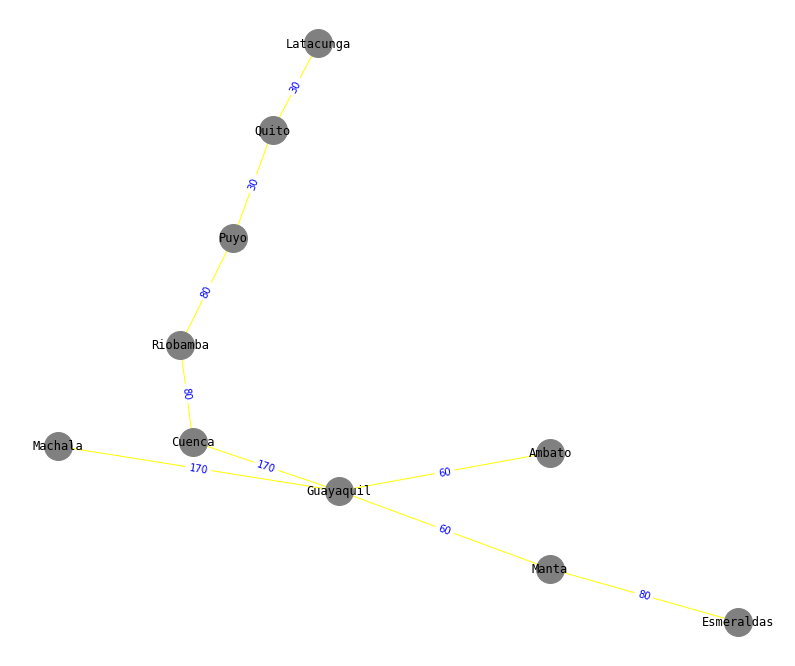

In [304]:
if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba':190, 'Quito':280, 'Guayaquil':170},
        'Latacunga': {'Ambato':50, 'Quito':30},
        'Esmeraldas': {'Manta':80},
        'Manta': {'Guayaquil':60},
        'Quito': {'Riobamba':110, 'Latacunga':30, 'Cuenca':280, 'Guayaquil':190, 'Puyo':170},
        'Riobamba': {'Cuenca':190, 'Quito':110},
        'Ambato': {'Latacunga':50, 'Puyo':80, 'Guayaquil':230},
        'Puyo': {'Ambato':60, 'Quito':170},
        'Machala': {'Guayaquil':80},
        'Guayaquil': {'Machala':80, 'Ambato':230, 'Quito':190, 'Cuenca':170, 'Manta':60}
    }

    init_state = 'Guayaquil'
    solution = 'Puyo'
    solution_node = search_costo_solucion(connections, init_state, solution)
        # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")
        
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
   
gf = nx.Graph()
gf.add_edge("Cuenca","Guayaquil", label = '170')
gf.add_edge("Latacunga","Quito", label = '30')
gf.add_edge("Esmeraldas","Manta", label = '80')
gf.add_edge("Manta","Guayaquil", label = '60')
gf.add_edge("Quito","Latacunga", label = '30')
gf.add_edge("Cuenca","Guayaquil", label = '170')
gf.add_edge("Riobamba","Cuenca", label = '80')
gf.add_edge("Puyo","Riobamba", label = '80')
gf.add_edge("Ambato","Guayaquil", label = '60')
gf.add_edge("Puyo","Quito", label = '30')
gf.add_edge("Machala","Guayaquil", label = '170')

etiquetas = [gf[u][v]['label'] for u,v in gf.edges()]
plt.figure(4,figsize=(14,12)) 
pos =nx.spring_layout(gf)
nx.draw_networkx_nodes(gf, pos, node_size=780, node_color='grey') #nodos
nx.draw_networkx_edges(gf, pos, edge_color='yellow') 
nx.draw_networkx_edge_labels(gf,pos,edge_labels={(u,v):gf[u][v]['label'] for u,v in gf.edges()} ,font_color='Blue')

nx.draw_networkx_labels(gf, pos, font_family='monospace',
        node_color="grey",
        edge_color="YELLOW",
        font_size=12) 
plt.axis('off')

plt.show()

## Arbol Jerarquico policia

####  Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Policia/UPC/Funcion Judicial, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas generando un arbol jerarquico.
#### Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


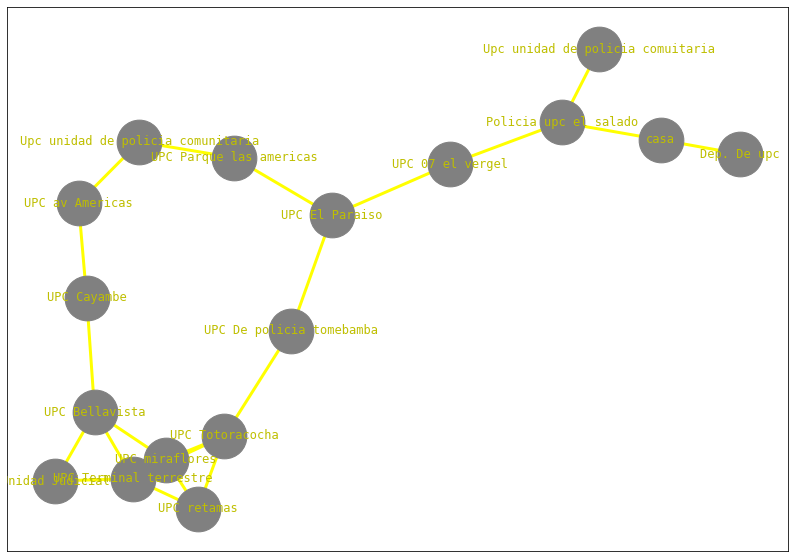

In [163]:
policia = {
    'casa': {'Policia upc el salado', 'Dep. De upc'}, 
    'Policia upc el salado': {'UPC 07 el vergel', 'Upc unidad de policia comuitaria','casa'},
    'UPC Parque las americas': {'Upc unidad de policia comunitaria', 'UPC El Paraiso'},
    'UPC El Paraiso':{'UPC De policia tomebamba','UPC 07 el vergel'},
    'UPC Totoracocha':{'UPC Terminal terrestre','UPC De policia tomebamba'},    
    'UPC av Americas':{'UPC Cayambe','Upc unidad de policia comunitaria'},
    'UPC Bellavista':{'UPC Terminal terrestre','UPC Cayambe'},    
    'UPC Terminal terrestre':{'UPC Bellavista','UPC Totoracocha','UPC miraflores'},    
    'UPC miraflores':{'UPC Terminal terrestre','UPC Bellavista','UPC Totoracocha'},
    'UPC retamas':{'UPC Terminal terrestre','UPC miraflores','UPC Totoracocha'}, 
    'UPC De policia tomebamba':{'UPC El Paraiso','UPC Totoracocha'},
    'Unidad Judicial':{'UPC Terminal terrestre','UPC Bellavista'} 
}

g = nx.Graph(policia)
#g.add_edge('casa','Dep. De upc',  label = '3')

for key, valor in policia.items():
        for i in valor:
            g.add_edge(key,i)
plt.figure(4,figsize=(14,10)) 
nx.draw_networkx(g,font_color='y',
        font_family='monospace',
        node_color="grey",
        edge_color="YELLOW",
        font_size=12,
        width=3, 
        with_labels=True, 
        node_size=2000) 
plt.show()

##### Resolucion
**n= 3**

**d= 14**
 
**Calculo**

14/3=4,6

 ##### Completitud
*Se puede decir que el algoritmo es completo ya que busca desde la raiz la ruta de menor costo, hasta allar la solucion
 ##### optimalidad
*Es optimo porque retorna la ruta con costo menor.
  
 ##### Complejidad temporal

\begin{equation*}
O =
\frac{(b^{n})}{}
\end{equation*}

\begin{equation*}
O =
\frac{(4,6^{3})}{ } {= 97.33}
\end{equation*}

  
 ##### Complejidad espacial
 
\begin{equation*}
O =
\frac{(b {}*n)}{} { = 4.6 *3}
\end{equation*}


\begin{equation*}
O =
\frac{}{} { 13,8}
\end{equation*}

Subir el cuaderno con la resolucion
Generar un arbol de expansion del COVID-19 en el Ecuador y agregarle al metodo de costo para obtener la ruta de contagio.


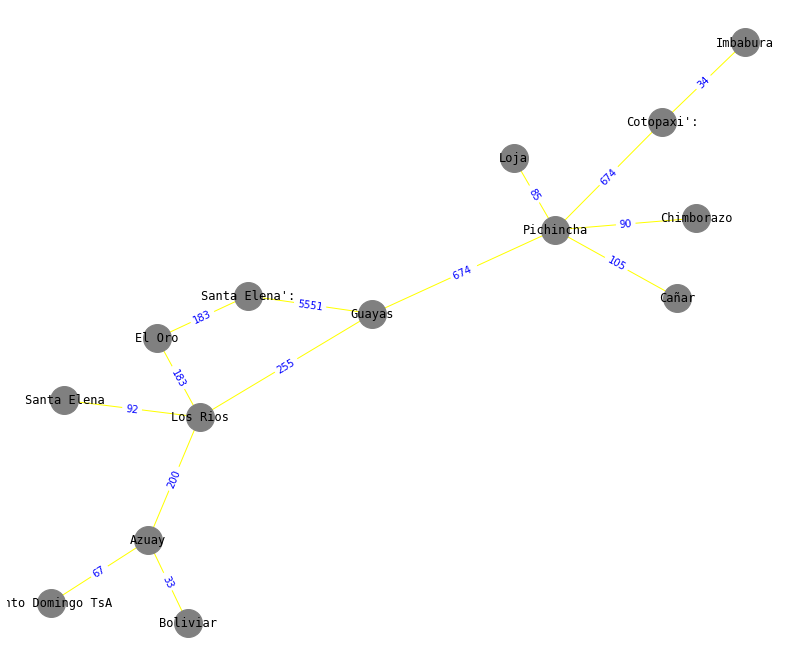

In [305]:
gr= nx.Graph()

gr.add_edge("Guayas", "Pichincha", weight = 3,label='674 ')
gr.add_edge("Guayas", "Los Rios", weight = 2.5,label ='255')
gr.add_edge("Los Rios", "El Oro", weight = 2.0,label ='183')
gr.add_edge("Los Rios", "Santa Elena", weight = 3.2,label ='92')
gr.add_edge("Los Rios", "Azuay", weight = 3,label ='200')
gr.add_edge("Pichincha", "Chimborazo", weight = 2.5,label ='90')
gr.add_edge("Pichincha", "Cañar", weight = 2.0, label ='105')
gr.add_edge("Pichincha", "Loja", weight = 3.2, label ='85')
gr.add_edge("Azuay", "Boliviar", weight = 3,label ='33')
gr.add_edge("Azuay", "Santo Domingo TsA", weight = 3,label ='67')
gr.add_edge("Cotopaxi':", "Imbabura", weight =2.5,label ='34')
gr.add_edge("Cotopaxi':", "Pichincha", weight =2.5,label ='674')
gr.add_edge("Santa Elena':", "Guayas", weight =2.5,label ='5551')
gr.add_edge("Santa Elena':", "El Oro", weight =2.5,label ='183')

weights = [gr[u][v]['weight'] for u,v in gr.edges()]
etiquetas = [gr[u][v]['label'] for u,v in gr.edges()]
plt.figure(4,figsize=(14,12)) 
pos =nx.spring_layout(gr)
nx.draw_networkx_nodes(gr, pos, node_size=780, node_color='grey') #nodos
nx.draw_networkx_edges(gr, pos, edge_color='yellow') 
nx.draw_networkx_edge_labels(gr,pos,edge_labels={(u,v):gr[u][v]['label'] for u,v in gr.edges()} ,font_color='Blue')

nx.draw_networkx_labels(gr, pos, font_family='monospace',
        node_color="grey",
        edge_color="YELLOW",
        font_size=12) 
plt.axis('off')

plt.show()

##### Agregarle al metodo de costo

In [298]:
# Implementacion del metodo de busqueda por costo
import networkx as nx
import matplotlib.pyplot as plt

def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y a0Š9adirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si est¨¢ en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Guayas':{'Pichincha':674,'Los Rios':255},
        'Los Rios':{'El Oro':183,'Santa Elena':92,'Azuay':200},
        'Pichincha':{'Chimborazo':90,'Cañar':105,'Loja':85},
        'Azuay':{'Bolivar':33,'Sto.Domingo TsA':67},
        'Cotopaxi':{'Imbabura':34,'Pichincha':674},
        'Santa Elena':{'Guayas':5551,'El Oro':183},      
        'El Oro':{'Los Rios':255},
        'Bolivar':{'Azuay':200},
        'Sto.Domingo TsA':{'Bolivar':33},
        'Loja':{'Pichincha':674},
        'Chimborazo':{'Cañar':105},
        'Cañar':{'Chimborazo':90}
    }

    init_state = 'Guayas'
    solution = 'Pichincha'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total por provincia: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion.....!")
        
        
print()


['Guayas', 'Pichincha']
Costo total por provincia: 674



# Conclusiones

###### La búsqueda comienza por el nodo raíz y continúa visitando el siguiente nodo que tiene menor costo total desde la raíz.